# Face Detection

#### in this lesson we'll learn:
1. [face detection in the image](#face-detection-in-the-image)
2. [face detection in the webcom](#face-detection-in-the-webcom)
3. [eye detection](#eye-detection)


## face and eye detection with Haar Cascade Classifier
### Haar Cascade Classifier Overview

Haar Cascade is a machine learning model used for object detection, particularly in real-time applications like face detection. It involves several key steps:

#### 1. Data Collection
- **Positive Images**: Images containing the object of interest (e.g., faces).
- **Negative Images**: Images without the target object, used to help the algorithm distinguish between the object and the background.

#### 2. Haar Feature Extraction
- **Haar Features**: Represent contrasts between different regions of an image, such as edges and lines. These features are calculated using rectangular regions to detect differences in brightness between adjacent parts of the image.
- **Example**: A Haar feature might detect the dark eye region next to a bright forehead.

#### 3. Integral Image
- This technique speeds up feature computation by allowing the efficient calculation of pixel sums within rectangular regions, reducing computational complexity.

#### 4. Classifier Training (AdaBoost)
- **Weak Classifiers**: Each Haar feature serves as a weak classifier, which performs slightly better than random guessing.
- **AdaBoost**: This algorithm combines several weak classifiers into a strong one by giving more importance (weight) to misclassified samples, creating an overall robust model.

#### 5. Cascade of Classifiers
- The classifier is structured as a cascade of stages, where each stage consists of several weak classifiers.
- **Early Stages**: Quickly eliminate regions that do not contain the object.
- **Later Stages**: More detailed and computationally expensive, but only applied to regions that passed the early stages.

#### 6. Optimization and Evaluation
- After training, the model is tested on new data. Parameters can be fine-tuned to improve accuracy, ensuring it performs well in real-time detection tasks.


## load library

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## face detection in the image

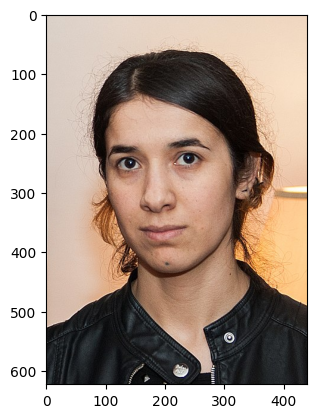

In [9]:
face = cv2.imread('C:/Users/Alireza/Downloads/Documents/DATA/Nadia_Murad.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

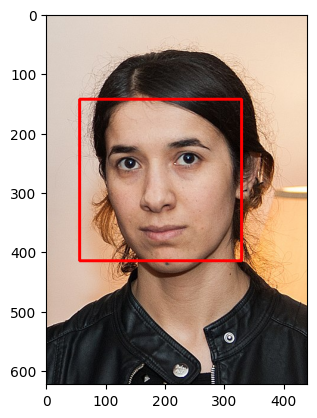

In [12]:
face_detec = cv2.CascadeClassifier('C:/Users/Alireza/Downloads/Documents/DATA/haarcascades/haarcascade_frontalface_default.xml')

img_gray = cv2.cvtColor(face, cv2.COLOR_RGB2GRAY)

faces = face_detec.detectMultiScale(img_gray, 1.3, 5)


for (x, y, w, h) in faces:
    cv2.rectangle(face, (x, y), (x + w, y + h), (255, 0, 0), 3)

plt.imshow(face)

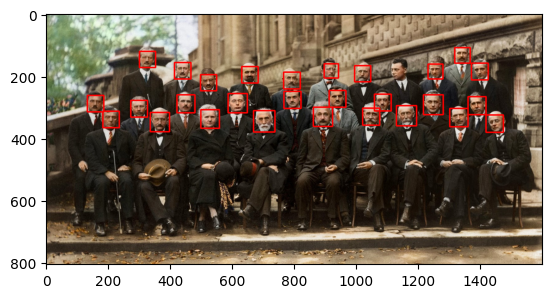

In [32]:
face = cv2.imread('C:/Users/Alireza/Downloads/Documents/DATA/solvay_conference.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

face_detec = cv2.CascadeClassifier('C:/Users/Alireza/Downloads/Documents/DATA/haarcascades/haarcascade_frontalface_default.xml')

img_gray = cv2.cvtColor(face, cv2.COLOR_RGB2GRAY)

faces = face_detec.detectMultiScale(img_gray, 1.2, 4)


for (x, y, w, h) in faces:
    cv2.rectangle(face, (x, y), (x + w, y + h), (255, 0, 0), 3)

plt.imshow(face)

## face detection in the webcom

In [40]:
face_detec = cv2.CascadeClassifier('C:/Users/Alireza/Downloads/Documents/DATA/haarcascades/haarcascade_frontalface_default.xml')

def face_detection(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    faces = face_detec.detectMultiScale(img_gray)

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)
    return img

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    face = face_detection(frame)

    cv2.imshow('webcom', face)

    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()

## eye detection

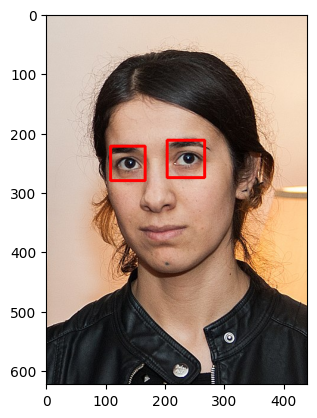

In [39]:
eye = cv2.imread('C:/Users/Alireza/Downloads/Documents/DATA/Nadia_Murad.jpg')

eye = cv2.cvtColor(eye, cv2.COLOR_BGR2RGB)

eye_detec = cv2.CascadeClassifier('C:/Users/Alireza/Downloads/Documents/DATA/haarcascades/haarcascade_eye.xml')

img_gray = cv2.cvtColor(eye, cv2.COLOR_RGB2GRAY)

eyes = eye_detec.detectMultiScale(img_gray, 1.2, 4)


for (x, y, w, h) in eyes:
    cv2.rectangle(eye, (x, y), (x + w, y + h), (255, 0, 0), 3)

plt.imshow(eye)